In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs , init_notebook_mode , plot,iplot
init_notebook_mode(connected=True)

In [2]:
reliance=pd.read_csv('C:/stock_market/reliance.csv')
reliance.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-15,521.258972,528.787598,519.401611,521.531433,508.178864,8921708
1,2016-12-16,521.060852,526.013916,521.060852,523.611694,510.205841,6895825
2,2016-12-19,522.546753,528.465698,522.224854,526.286316,512.811951,6926943
3,2016-12-20,522.398193,525.518616,521.630493,523.983154,510.567841,5394088
4,2016-12-21,525.072815,528.639038,523.636475,526.633057,513.149841,9399779


In [3]:
reliance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1235 non-null   object 
 1   Open       1235 non-null   float64
 2   High       1235 non-null   float64
 3   Low        1235 non-null   float64
 4   Close      1235 non-null   float64
 5   Adj Close  1235 non-null   float64
 6   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [4]:
reliance['Date']=pd.to_datetime(reliance['Date'])

In [5]:
print(f'Dataframe contains stock prices between {reliance.Date.min()} {reliance.Date.max()}')
print(f'Total days={(reliance.Date.max() -reliance.Date.min()).days} days')

Dataframe contains stock prices between 2016-12-15 00:00:00 2021-12-14 00:00:00
Total days=1825 days


In [6]:
reliance.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,1387.429767,1403.449912,1369.961474,1385.887710,1374.651265,1.039920e+07
std,562.693039,568.539964,554.857592,560.987691,565.701573,7.675125e+06
min,503.725189,509.569794,501.644897,503.180359,490.297638,7.871600e+05
25%,925.452636,935.111084,915.918030,924.982117,907.909241,5.825892e+06
50%,1261.789551,1272.438599,1245.295898,1261.591431,1246.822388,8.079833e+06
75%,1949.549988,1968.400024,1926.349976,1947.275024,1941.030884,1.212276e+07
max,2742.750000,2751.350098,2708.000000,2731.850098,2731.850098,6.584835e+07


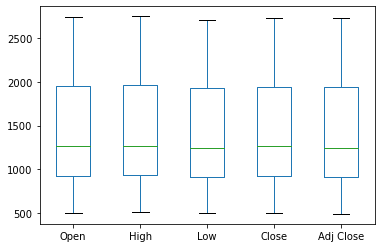

In [7]:
reliance[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [8]:
#setting the layout for our plot 
layout = go.Layout(
    title='Stock Prices of reliance',
    xaxis=dict(
       title='Date',
       titlefont=dict(
          family='Courier New,monospace',
          size=18,
          color='#7f7f7f'
    )
    ),
    yaxis = dict(
        title='Price',
        titlefont=dict(
            family='Courier New,monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
reliance_data = [{'x':reliance['Date'], 'y':reliance['Close']}]
Plot = go.Figure(data=reliance_data,layout=layout)

In [9]:
iplot(Plot)

In [10]:
#buliding the regression model
from sklearn.model_selection import train_test_split
#for preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#for model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [11]:
#Split the data into train and test sets 
X=np.array(reliance.index).reshape(-1,1)
Y=reliance['Close']
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3, random_state=101)

In [12]:
#feature scaling
scaler = StandardScaler().fit(X_train)

In [13]:
from sklearn.linear_model import LinearRegression 

In [14]:
#creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [15]:
#plot actual and predicted values for train dataset
trace0=go.Scatter(
    x=X_train.T[0],
    y=Y_train,
    mode = 'markers',
    name='Actual'
)
trace1=go.Scatter(
    x=X_train.T[0],
    y=lm.predict(X_train).T,
    mode='lines',
    name='predicted'
)
reliance_data=[trace0,trace1]
layout.xaxis.title.text='Day'
plot2 = go.Figure(data=reliance_data,layout=layout)

In [16]:
iplot(plot2)

In [17]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center (20) }{'Test'.center (20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict (X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.9102021704690323	0.9072462140556545
MSE       28105.001513074298	28967.493104997542

